Datos cargados, con dimensiones: (1460, 6)
Datos de entrenamiento: 1168 filas
Datos de validación: 292 filas
Análisis exploratorio de los datos de entrenamiento:


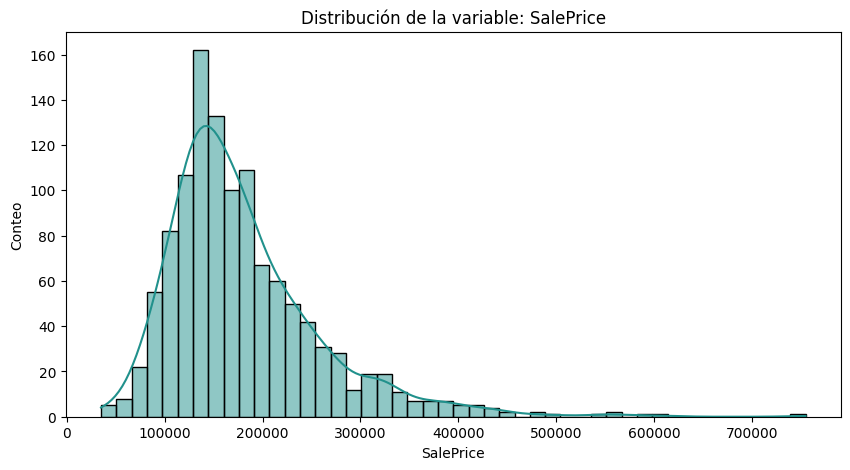

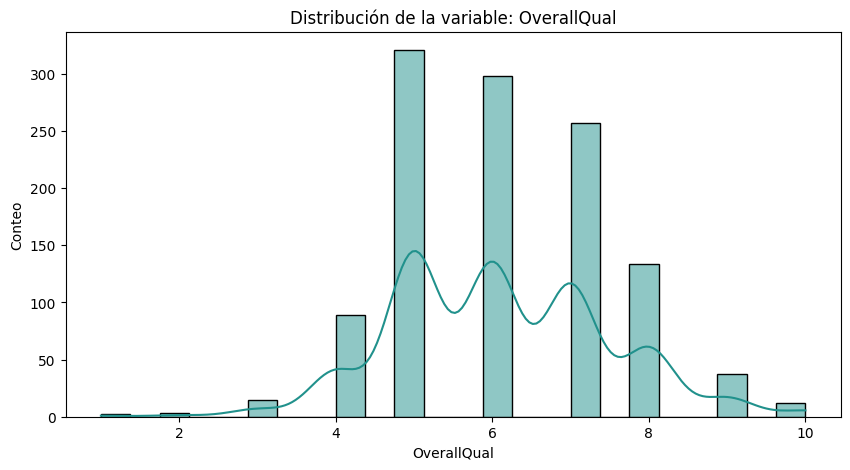

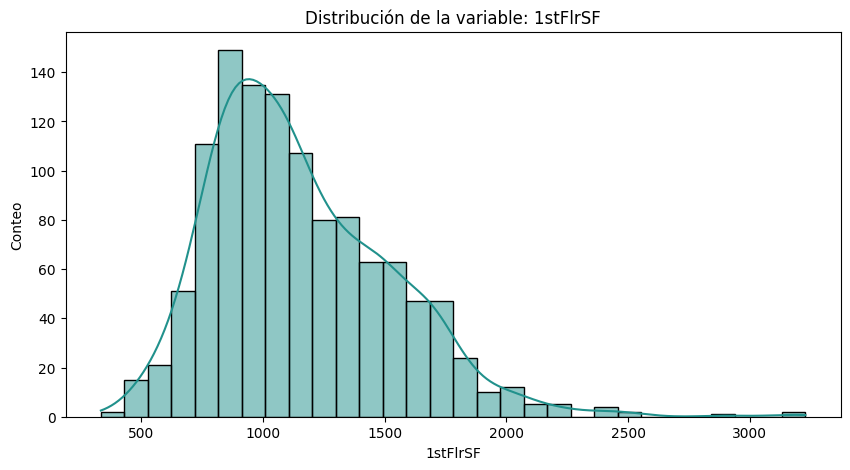

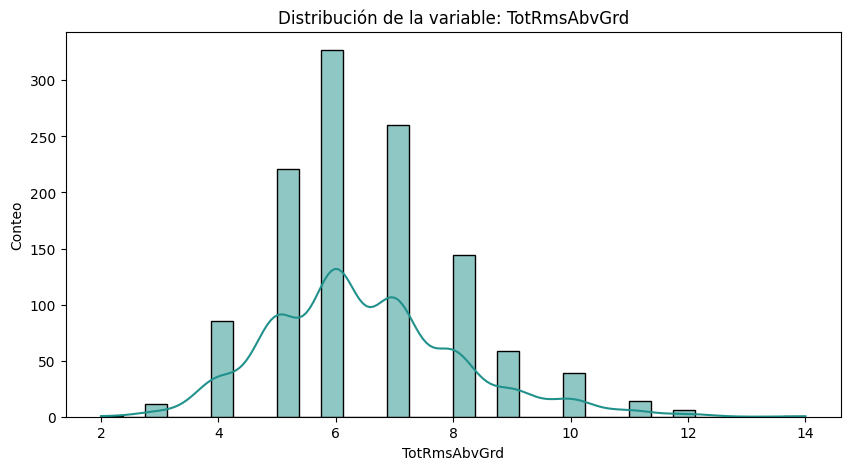

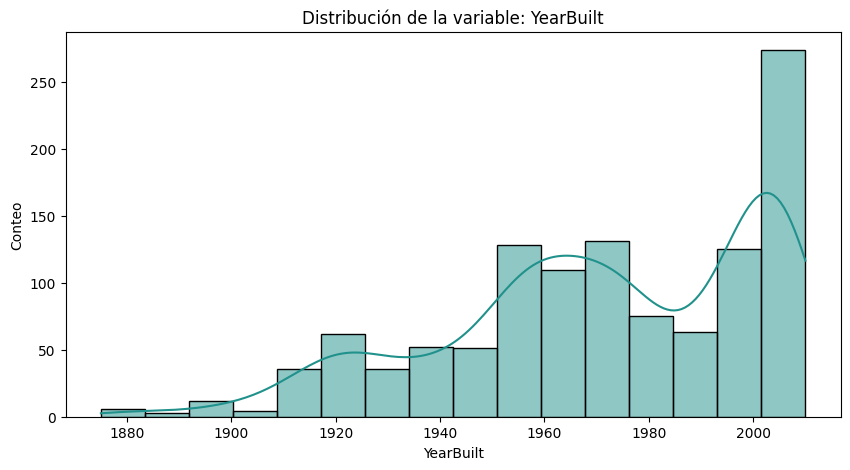

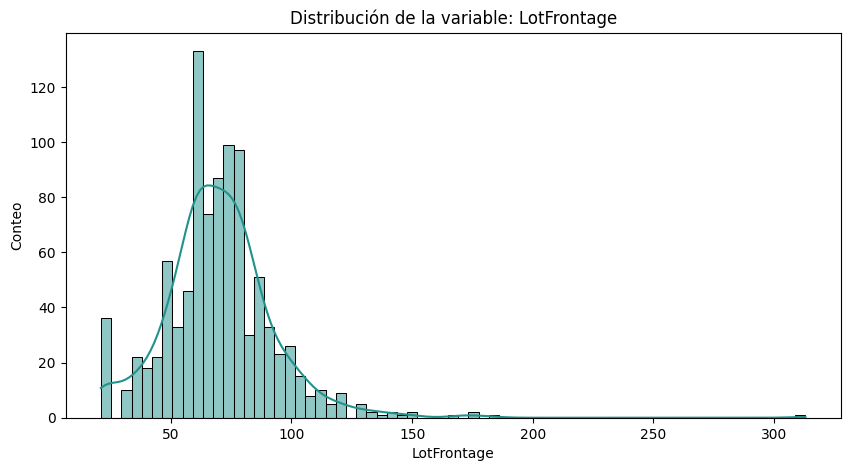

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
Media,180590.277397,6.101027,1156.323630,6.485445,1971.451199,NaN
Mediana,162950.000000,6.000000,1086.000000,6.000000,1973.000000,NaN
Máximo,755000.000000,10.000000,3228.000000,14.000000,2010.000000,NaN
Mínimo,34900.000000,1.000000,334.000000,2.000000,1875.000000,NaN
Rango,720100.000000,9.000000,2894.000000,12.000000,135.000000,NaN
Desviación Estándar,78781.951080,1.377435,373.620332,1.608452,29.938882,NaN


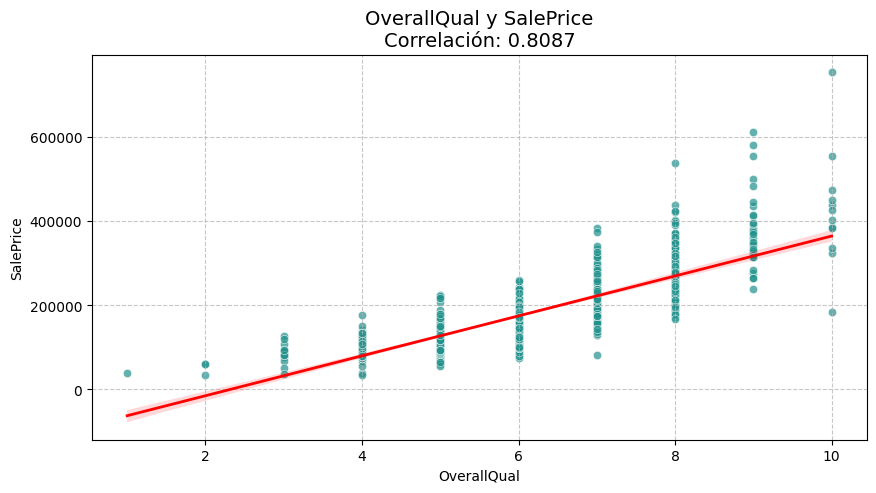

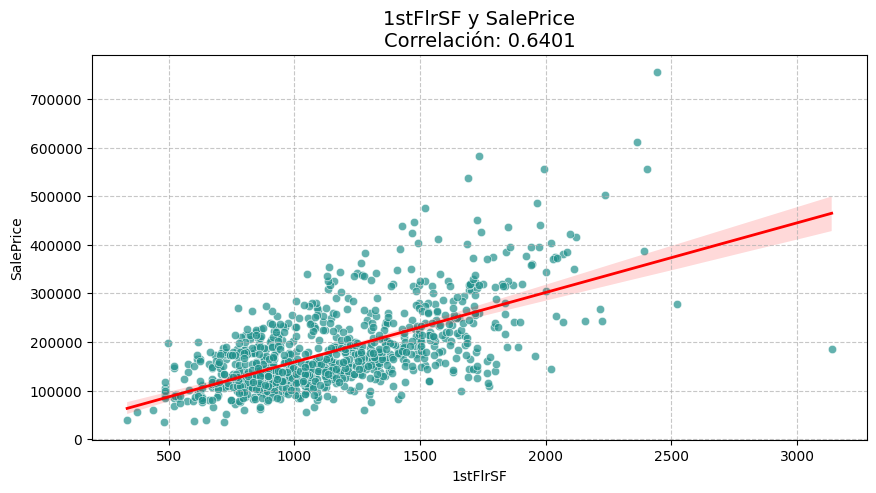

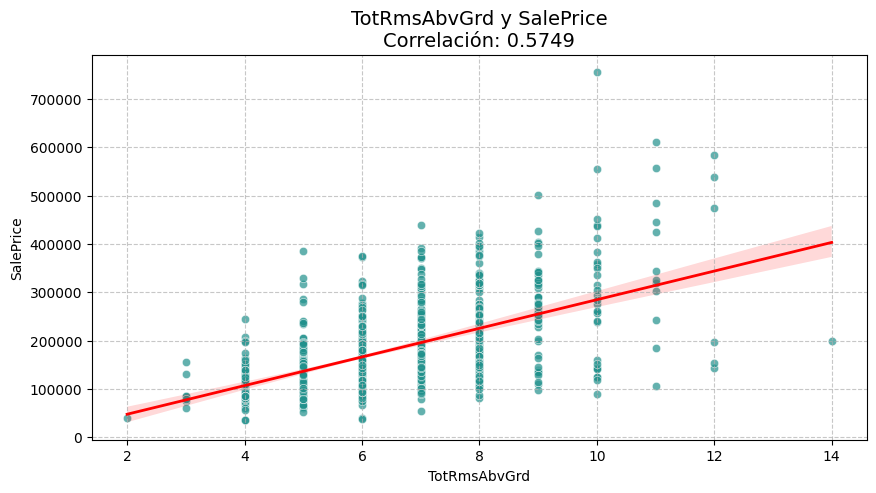

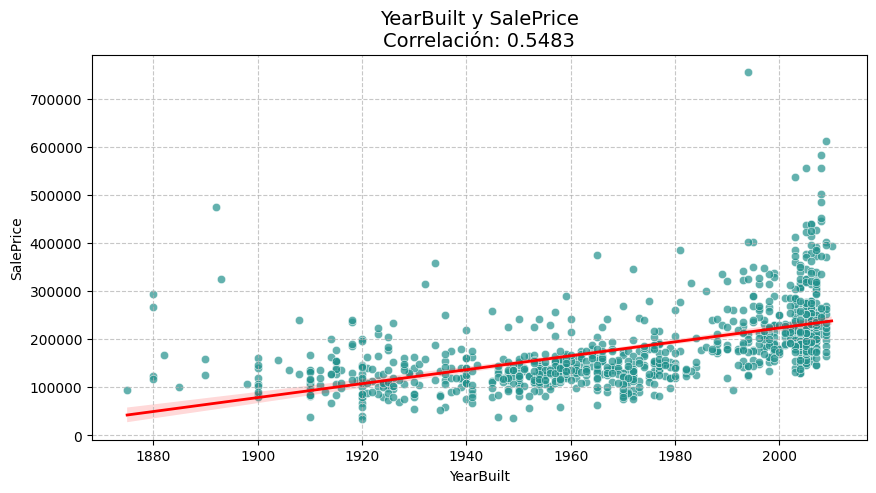

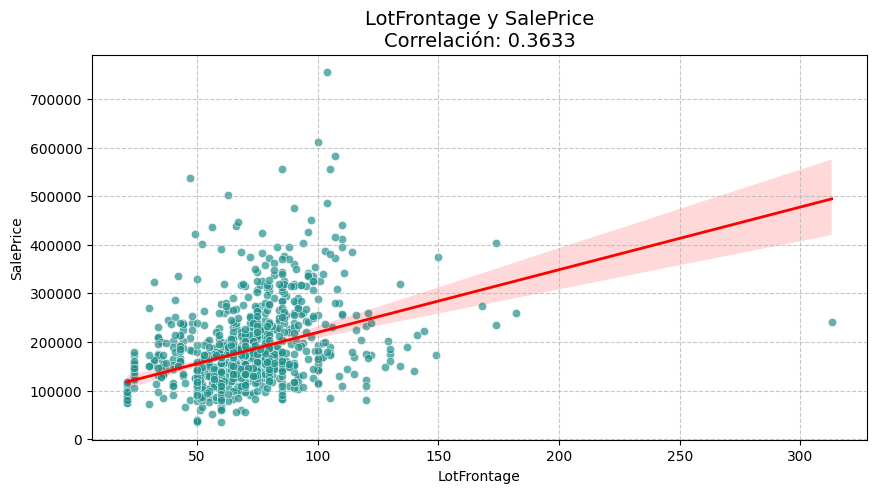

NameError: name 'top2_corr' is not defined

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt   
import seaborn as sns
from sklearn.linear_model import LinearRegression

class RegresionLinealManual:
    '''
    Clase para la construcción y análisis de regresión lineal univariada desde 0
    '''
    def __init__(self, archivo):
        '''
            Constructor de la clase que carga los datos y separa los datos de entrenamiento(train) y validación(tes) 
        '''
        # Carga de datos a partir del archivo o ruta de archivo .npy indicado
        _columnas = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']
        self.modelos_0 = {}
        self.modelos_sk = {}
        
        _data = np.load(archivo)
        print(f'Datos cargados, con dimensiones: {_data.shape}')
        
        # Separación de datos de entrenamiento y validación (80% - 20%)
        _total_filas = _data.shape[0]
        _indicador_split = int(_total_filas * 0.8)
        self.train = _data[:_indicador_split]
        self.test = _data[_indicador_split:]
        self.df_train = pd.DataFrame(self.train, columns=_columnas)
        self.df_test = pd.DataFrame(self.test, columns=_columnas)
        print(f'Datos de entrenamiento: {self.train.shape[0]} filas')
        print(f'Datos de validación: {self.test.shape[0]} filas')   
    
    def analisis_exploratorio(self):
        '''
            Función que realiza un análisis exploratorio en los datos de entrenamiento
        '''
        # Creación de DataFrame a partir de los datos de entrenamiento
        _df = self.df_train.copy()
        # Generación de estadísticas descriptivas que ofrece pandas
        print('Análisis exploratorio de los datos de entrenamiento:')
        '''
        display(_df.describe())
        display(_df.info())
        display(_df.isnull().sum())
        '''
        _estadisticas = {}
        for _c in _df.columns:
            _values = _df[_c].values
            
            # Calculando medidas de tendencia central
            _estadisticas[_c]= {
                'Media': np.mean(_values),
                'Mediana': np.median(_values),
                'Máximo': np.max(_values),
                'Mínimo': np.min(_values),
                'Rango': np.ptp(_values),
                'Desviación Estándar': np.std(_values)
            }
            
            plt.figure(figsize=(10, 5))
            sns.histplot(_values, kde=True,color=plt.cm.viridis(0.5))
            plt.title(f'Distribución de la variable: {_c}')
            plt.xlabel(_c)
            plt.ylabel('Conteo')
            plt.show()
        display(pd.DataFrame(_estadisticas))
            
    def obtener_coef_corr(self, plot=False):
        '''
            Función para generar los coeficientes de correlación en los datos de entrenamiento
        '''
        _df = self.df_train.copy().dropna()
        _X = _df.drop('SalePrice', axis=1)
        _y = _df.SalePrice
        _correlaciones = {}
        for _c in _X.columns:
            _x = _X[_c].values 
            _corr = np.corrcoef(_x, _y)[0, 1]
            _correlaciones[_c] = _corr
            if plot:
                plt.figure(figsize=(10, 5))
                sns.scatterplot(x=_x, y=_y, alpha=0.7,color=plt.cm.viridis(0.5))
                sns.regplot(x=_x, y=_y, scatter=False,line_kws={'color': 'red', 'linewidth': 2})
                plt.xlabel(_c)
                plt.ylabel('SalePrice')
                plt.title(f'{_c} y SalePrice\nCorrelación: {_corr:.4f}', fontsize=14)
                plt.grid(True, linestyle='--', alpha=0.7)
                plt.show()
            
        _top2_corr = sorted(_correlaciones.items(), key=lambda x: abs(x[1]), reverse=True)[:2]
        print(f'Las dos variables con mayor correlacion son: {_top2_corr[0][0]} y {_top2_corr[1][0]}')
        
    

obj = RegresionLinealManual('proyecto_training_data.npy')
obj.analisis_exploratorio()
obj.obtener_coef_corr(True)
